**Hola!**

Mi nombre es Maria Efimova, voy a revisar tu proyecto. Encantada de conocerte :)
Está bien si hablamos en 'Tú'? Por favor, dime si eso no está bien para tí, lo cambiaremos. Soy Miguel Gutierrez, cientifico de datos en MercadoLibre y lo tomare en la segunda iteracion ! ;)

Mi trabajo no es señalar los errores que cometiste, sino compartir mi experiencia y ayudarte a convertirte en analista de datos. Ya has trabajado mucho en el proyecto, pero vamos a hacerlo aún mejor. A continuación encontrará mis comentarios; no los mueva, modifique ni elimine. Usaré marcas de color:


<div class="alert alert-danger">
<b>❌ Comentario del revisor:</b> Esto destaca los comentarios más importantes. Sin su desarrollo, el proyecto no será aceptado. </div>


<div class="alert alert-warning">
<b>⚠️ Comentario del revisor:</b> Así que los pequeños comentarios están resaltados. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberá hacer las correcciones. Es como una tarea de prueba al solicitar un trabajo: muchos pequeños errores pueden hacer que un candidato sea rechazado.

</div>

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Así que destaco todos los demás comentarios.</div>

Vamos a trabajar en el proyecto en un diálogo: si cambias algo en el proyecto o respondes a mis comentarios, escribe sobre eso. Será más fácil para mí seguir los cambios si resaltas tus comentarios asi:
<div class="alert alert-info"> <b>Comentario del estudiante:</b> Por ejemplo, asi.</div>

Todo esto ayudará a volver a revisar tu proyecto más rápido.
 

Recuerde que, si quieres dejarme un comentario en alguna parte del documento, sólo tiene que dar doble clic sobre la celda de arriba, copiar el código, pegarlo en una nueva celda y sustituir la frase "En celdas como estas puede dejarme sus comentarios" por su propio comentario. Asegúrese sólamente que la celda donde usted vaya a incluir su comentario esté en formato "Markdown".

Respecto del proceso de revisión, esta es la <b>primera iteración</b> para este ejercicio. Su proyecto será aceptado una vez que los comentarios en rojo hayan sido atendidos. Al final de este Notebook encontrará comentarios con mis observaciones finales.

## Inicialización

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [21]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

In [22]:
from keras import losses 
from keras import optimizers 
from keras import metrics 

In [23]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AvgPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

## Carga los datos

El conjunto de datos se almacena en la carpeta `/datasets/faces/` 
- La carpeta `final_files` con 7600 fotos 
- El archivo `labels.csv` con etiquetas, con dos columnas: `file_name` y `real_age` 
Dado que el número de archivos de imágenes es bastante elevado, se recomienda evitar leerlos todos a la vez, ya que esto consumiría muchos recursos computacionales. Te recomendamos crear un generador con ImageDataGenerator. Este método se explicó en el capítulo 3, lección 7 de este curso.

El archivo de etiqueta se puede cargar como un archivo CSV habitual.

In [24]:
df_labels = pd.read_csv('/datasets/faces/labels.csv')

In [25]:
df_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


In [26]:
datagen = ImageDataGenerator(horizontal_flip=False,
        vertical_flip=False, rescale=1/255.)
datagen_flow = datagen.flow_from_directory(
    '/datasets/faces/',
    target_size=(150, 150),
    batch_size=32,
    class_mode='sparse',
    seed=12345,
    ) 

Found 7591 images belonging to 1 classes.


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Genial!

## EDA

In [27]:
df_labels.duplicated().value_counts()

False    7591
dtype: int64

In [28]:
df_labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


array([[<AxesSubplot:title={'center':'real_age'}>]], dtype=object)

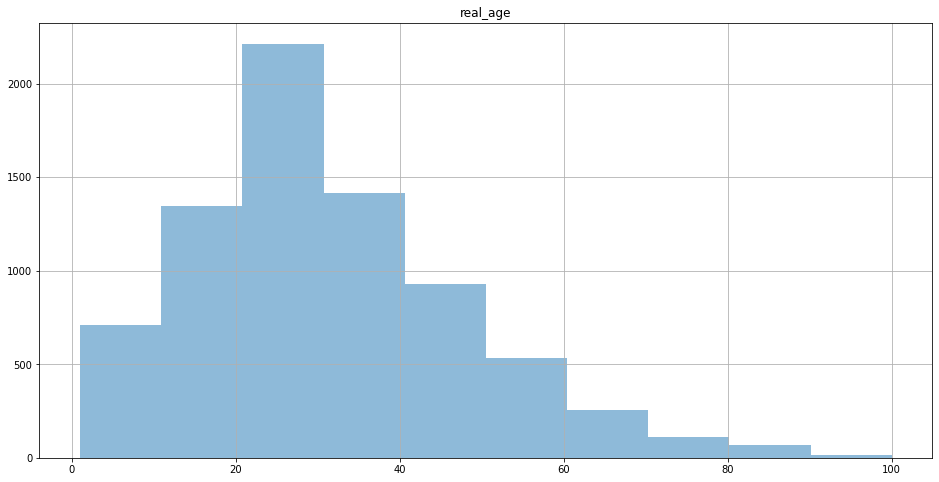

In [29]:
df_labels.hist(column='real_age', alpha=0.5, figsize = (16,8), bins=10)

<AxesSubplot:>

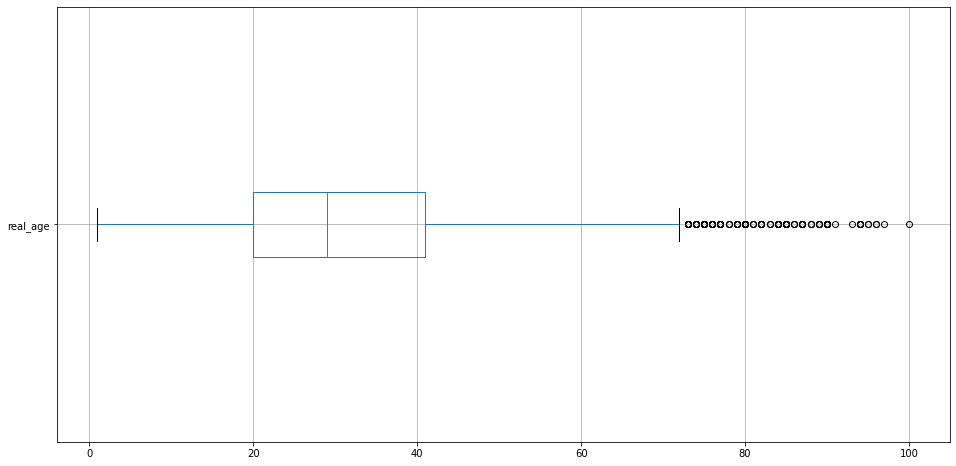

In [30]:
df_labels.boxplot(column='real_age', vert=False, figsize = (16,8))

La gráfica de distribución de edades muestra un sesgo hacia la izquierda, por lo que se infiere que la mediana es más pequeña que la media de la población.
Las personas debajo del primer cuartil tienen entre 0 y 21 años, el segundo cuartil comprende edades entre 21 y 29 años, el tercer cuartil está compuesto por personas entre 29 y 41 años, y el último se compone por personas entre 41 y 72 años. Finalmente, existen un último grupo de personas que se considera atípico cuya edad se encuentra entre 71 y 100 años. 

<div class="alert alert-danger">
<b>❌ Comentario del revisor:</b> Bien pero te pido anadir aqui los conclusiones **HECHO**

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Listo con las conclusiones sobre las edades observadas en el boxplot.</div>

### Evaluación del dataset con fotos de diferentes edades

In [31]:
features, target = next(datagen_flow)

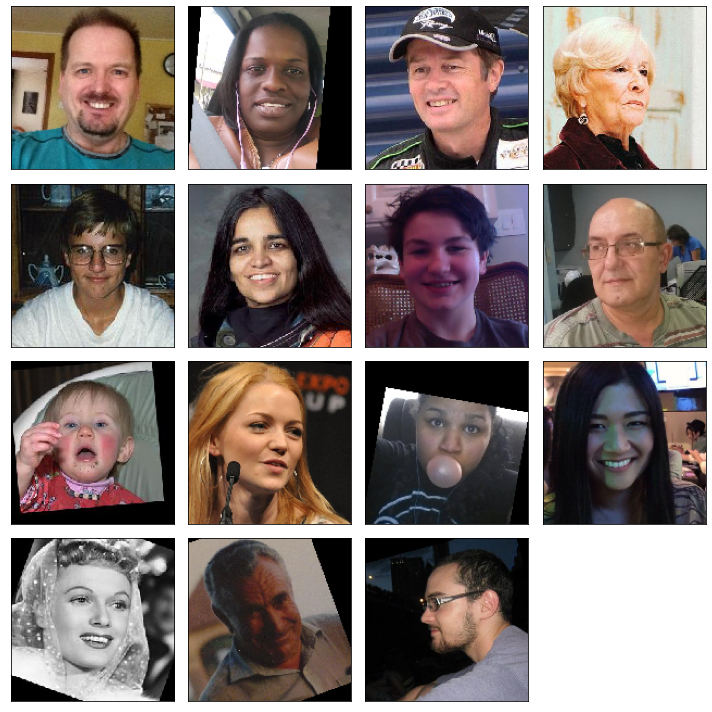

In [32]:
fig = plt.figure(figsize=(10,10))
for i in range(15):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

### Conclusiones

- La mediana de edad es 29 años, con un mínimo de edad de 1 año y máximo de 100 años. 
- El 75% de las fotos encontradas pertenencen a peronas menores de 42 años.
- Existe un pequeño porcentaje de personas, extraordinario desde un punto de vista estadístico, que se encuentran por encima del rango intercuartil superior, esto es, por encima de los 72 años (IQR+Q3*1.5).


<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Funciona correcto! Los conclusiones tambien son corrctos

## Modelado

Define las funciones necesarias para entrenar tu modelo en la plataforma GPU y crea un solo script que las contenga todas junto con la sección de inicialización.

Para facilitar esta tarea, puedes definirlas en este notebook y ejecutar un código listo en la siguiente sección para componer automáticamente el script.

Los revisores del proyecto también verificarán las definiciones a continuación, para que puedan comprender cómo construiste el modelo.

In [33]:
def load_train(path):
    
    labels = pd.read_csv('/datasets/faces/labels.csv')

    train_datagen = ImageDataGenerator(
        validation_split=0.25,
        horizontal_flip=True,
        rescale=1. / 255)
    
    train_gen_flow = train_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='training',
        seed=12345)

    return train_gen_flow

In [34]:
def load_test(path):
    
    labels = pd.read_csv(path + 'labels.csv')
    
    test_datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1. / 255)
    
    test_gen_flow = test_datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=16,
        class_mode='raw',
        subset='validation',
        seed=12345)

    return test_gen_flow

In [35]:
def create_model(input_shape):
     
    backbone = ResNet50(input_shape=(150, 150, 3),
                    weights='imagenet',
                    include_top=False)

    model = Sequential()
    model.add(backbone)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1, activation='relu'))

    optimizer = Adam(lr=0.0001)
    
    model.compile(optimizer=optimizer, loss='mean_squared_error',
                  metrics=['mae'])


    return model

In [36]:
def train_model(
    model, 
    train_data, 
    test_data, 
    batch_size=None, 
    epochs=20,
    steps_per_epoch=None, 
    validation_steps=None):

    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)
    if validation_steps is None:
        validation_steps = len(test_data)

    model.fit(train_data,
              validation_data=test_data,
              batch_size=batch_size, epochs=epochs,
              steps_per_epoch=steps_per_epoch,
              validation_steps=validation_steps,
              verbose=2)

    return model

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Genial! Aqui todo esta bien!

## Prepara el script para ejecutarlo en la plataforma GPU

Una vez que hayas definido las funciones necesarias, puedes redactar un script para la plataforma GPU, descargarlo a través del menú "File|Open..." (Archivo|Abrir) y cargarlo más tarde para ejecutarlo en la plataforma GPU.

Nota: el script debe incluir también la sección de inicialización. A continuación se muestra un ejemplo.

In [37]:
init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### El resultado

Coloca el resultado de la plataforma GPU como una celda Markdown aquí.

Test MAE: 6.4362

## Conclusiones

- Se verificó el tamaño del dataset de etiquetas y el número de fotografías en la carpeta. No existen datos duplicados ni datos ausentes.
- Se realizó el análisis exploratorio de datos para las edades, encontrando que la mediana de edad es de 29 años, y el 75% de los datos son personas menores a 42 años. Se realizó un muestreo de 16 fotografías por medio del generador de imágenes, observando que el generador de imágenes funciona correctamente trayendo de vuelta imágenes con caras de personas de distintas edades.
- Se dividió el entrenamiento del modelo en 4 partes: se separó los datos de entrenamiento y los datos de verificación desde la carpeta de locación de las fotografías; se creó un modelo ResNet50 con GlobalAveragePooling2D y optimizado con Adam; finalmente se corrieron 20 épocas durante el ajuste del modelo, utilizando MAE como la métrica del modelo.
- Al final del entrenamiento se obtuvo un MAE de 6.4362, menor al 8 solicitado, lo cual indica para la regresión que el modelo es capaz de distinguir la edad del compardor por medio del sistema de reconocimiento facial con un error de este tamaño.

# Lista de control

- [x]  El Notebook estaba abierto 
- [x]  El código no tiene errores
- [x]  Las celdas con el código han sido colocadas en el orden de ejecución
- [x]  Se realizó el análisis exploratorio de datos 
- [x]  Los resultados del análisis exploratorio de datos se presentan en el notebook final 
- [x]  El valor EAM del modelo no es superior a 8 
- [x]  El código de entrenamiento del modelo se copió en el notebook final 
- [x]  El resultado de entrenamiento del modelo se copió en el notebook final 
- [x] Los hallazgos se proporcionaron con base en los resultados del entrenamiento del modelo

<div class="alert alert-success">
<b>✔️ Comentario del revisor:</b> Muchas gracias por tu proyecto! Te pido anadir los conclusiones despues de boxplot y despues estoy lista para aceptar tu proyecto!